In [8]:
import numpy as np
import pandas as pd
import ast
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

perfumes_df = pd.read_csv("../data_csv/perfumes_table.csv")

des_df = pd.read_csv("../data_csv/description_embedding.csv", header=None)
rev_df = pd.read_csv("../data_csv/reviews_embeddings.csv", header=None)

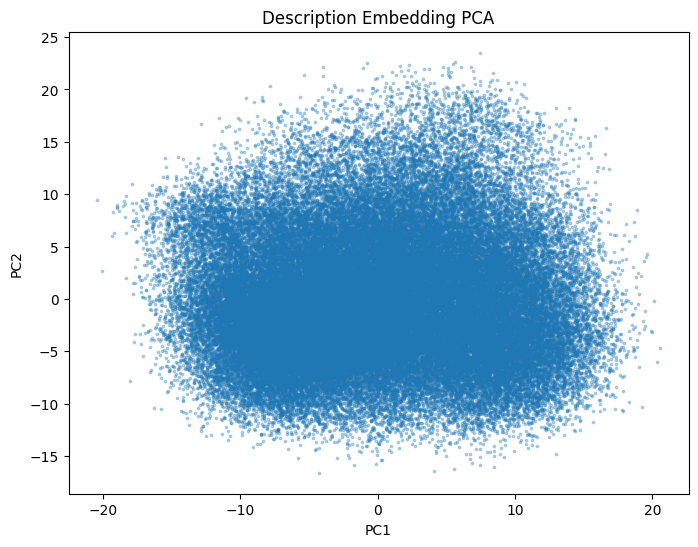

In [9]:
des_embeddings = des_df.iloc[:, 2].apply(ast.literal_eval).to_list()
rev_embeddings = rev_df.iloc[:, 2].apply(ast.literal_eval).to_list()

X = np.vstack(des_embeddings).astype("float32")
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=3, alpha=0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Description Embedding PCA")
plt.show()


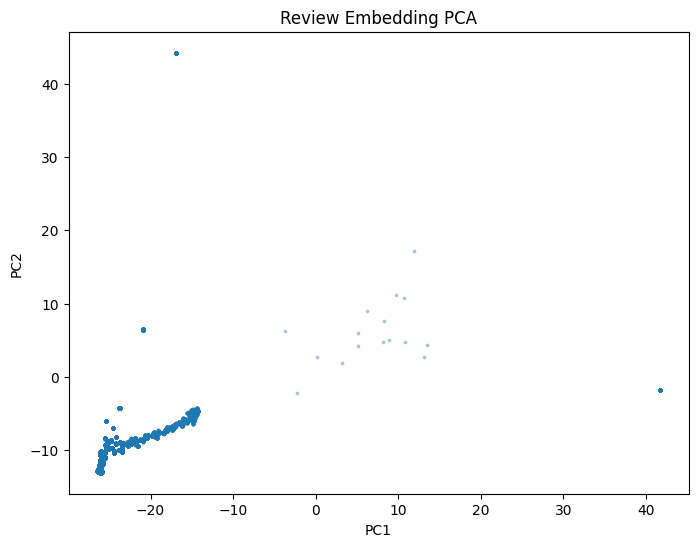

In [10]:
Xr = np.vstack(rev_embeddings).astype("float32")
Xr = StandardScaler().fit_transform(Xr)
Xr_pca = pca.fit_transform(Xr)

plt.figure(figsize=(8, 6))
plt.scatter(Xr_pca[:, 0], Xr_pca[:, 1], s=3, alpha=0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Review Embedding PCA")
plt.show()

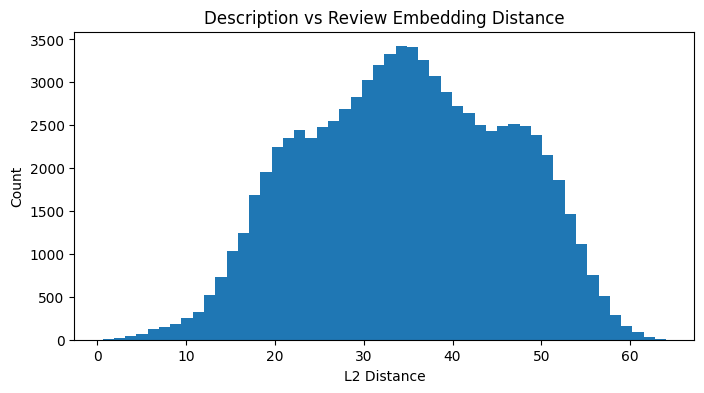

In [11]:
n = min(X_pca.shape[0], Xr_pca.shape[0])
dist = np.linalg.norm(X_pca[:n] - Xr_pca[:n], axis=1)

plt.figure(figsize=(8, 4))
plt.hist(dist, bins=50)
plt.title("Description vs Review Embedding Distance")
plt.xlabel("L2 Distance")
plt.ylabel("Count")
plt.show()